Perform the necessary exploratory data analysis and discuss your findings. You should make use of graphs and tables, as necessary. The submission should include **(BUT NOT ONLY)** answers to the following questions:

- What are the most listened songs?
- Who are the most popular artists?
- How is the distribution of song count for users?

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
song_data = pd.read_csv('/content/drive/MyDrive/Machine_Learning/projectt_music/song_dataset.csv')



In [18]:
song_data.head(10)

,user,song,play_count,title,release,artist_name,year
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAPDEY12A81C210A9,1,Nothing from Nothing,To Die For,Billy Preston,1974
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFNSP12AF72A0E22,1,Under Cold Blue Stars,Under Cold Blue Stars,Josh Rouse,2002
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFOVM12A58A7D494,1,Riot Radio (Soundtrack Version),Nick & Norah's Infinite Playlist - Original Mo...,The Dead 60s,0
5,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBNZDC12A6D4FC103,1,Sin límites (I),Amset,Amset,0
6,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBSUJE12A6D4F8CF5,2,12 segundos de oscuridad,10 + Downloaded,Jorge Drexler,2006
7,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBVFZR12A6D4F8AE3,1,Ears To The Ground (Album Version),Under Cold Blue Stars,Josh Rouse,2002
8,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXALG12A8C13C108,1,Food Chain (Album Version),Sounds Like This,Eric Hutchinson,2008
9,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007


In [19]:
song_data.shape

(102627, 7)

In [20]:
# Most Listened Songs
song_listen_counts = song_data.groupby('title')['play_count'].sum().reset_index()
song_listen_counts = song_listen_counts.sort_values('play_count', ascending=False).head(10)



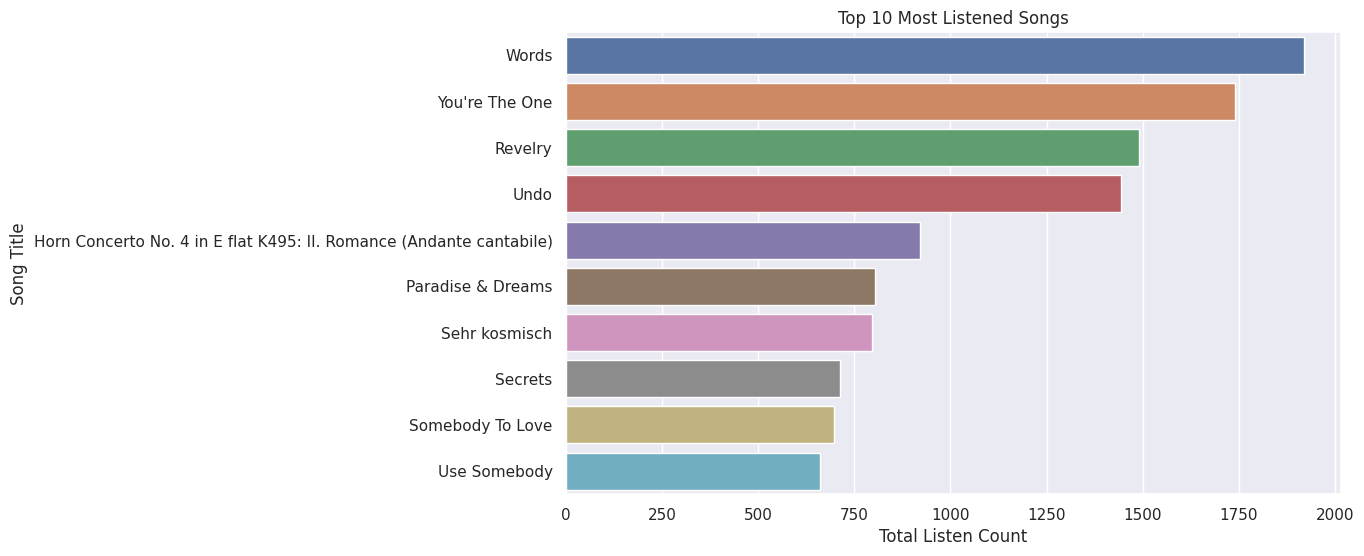

<Figure size 640x480 with 0 Axes>

In [28]:
# Plotting the most listened songs
plt.figure(figsize=(10, 6))
sns.barplot(data=song_listen_counts, x='play_count', y='title')
plt.title('Top 10 Most Listened Songs')
plt.xlabel('Total Listen Count')
plt.ylabel('Song Title')
plt.show()
plt.savefig('statics/Top_10_Most_Listened_Songs.png')


In [22]:
# Most Popular Artists
artist_listen_counts = song_data.groupby('artist_name')['play_count'].sum().reset_index()
artist_listen_counts = artist_listen_counts.sort_values('play_count', ascending=False).head(10)


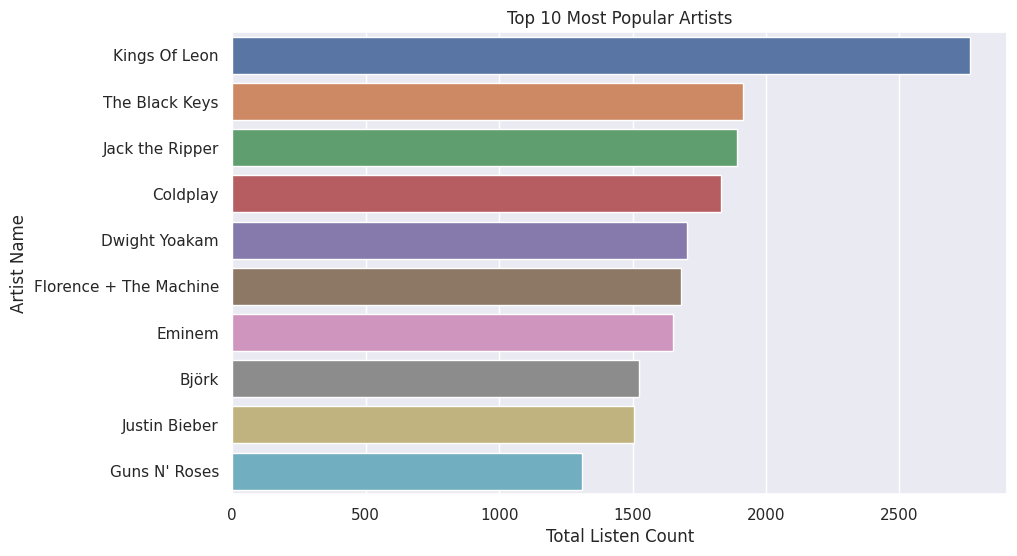

<Figure size 640x480 with 0 Axes>

In [29]:
# Plotting the most popular artists
plt.figure(figsize=(10, 6))
sns.barplot(data=artist_listen_counts, x='play_count', y='artist_name')
plt.title('Top 10 Most Popular Artists')
plt.xlabel('Total Listen Count')
plt.ylabel('Artist Name')
plt.show()
plt.savefig('statics/Top_10_Most_Popular_Artists.png')


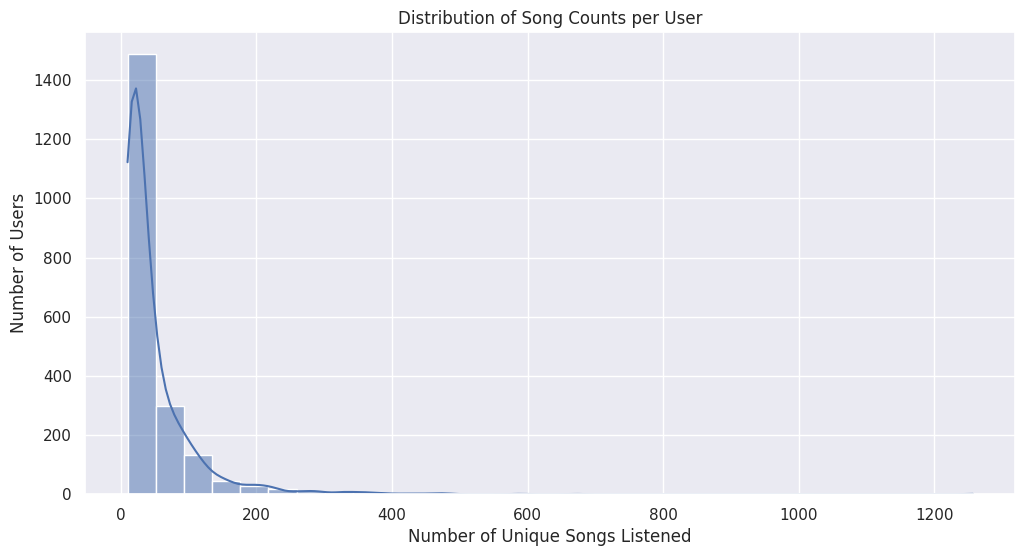

count    2042.000000
mean       48.971596
std        64.134063
min        10.000000
25%        16.000000
50%        28.000000
75%        56.000000
max      1257.000000
Name: song, dtype: float64


<Figure size 640x480 with 0 Axes>

In [30]:
# Distribution of Song Count for Users
user_song_counts = song_data.groupby('user')['song'].nunique().reset_index()

# Plotting the distribution of song count for users
plt.figure(figsize=(12, 6))
sns.histplot(user_song_counts['song'], bins=30, kde=True)
plt.title('Distribution of Song Counts per User')
plt.xlabel('Number of Unique Songs Listened')
plt.ylabel('Number of Users')
plt.show()

# Display descriptive statistics for the user song counts
print(user_song_counts['song'].describe())
plt.savefig('statics/Distribution_of_Song.png')

Implement a recommendation engine which takes as input a user in the database and recommends one (or multiple) song(s) he has not listened to yet. Describe your approach and briefly discuss your design choices and what the other possible alternatives are.

In [ ]:
# import pandas as pd
# from scipy.sparse import csr_matrix
# from sklearn.neighbors import NearestNeighbors

# # # Load the dataset
# # song_data = pd.read_csv('/content/drive/MyDrive/Machine_Learning/projectt_music/song_dataset.csv')

# # Create a user-item matrix
# user_item_matrix = song_data.pivot_table(index='user', columns='title', values='play_count').fillna(0)

# # Convert to a sparse matrix for more efficient calculations
# user_item_matrix_sparse = csr_matrix(user_item_matrix.values)


In [ ]:
# # Using cosine similarity
# model_knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)

# # Fit the model
# model_knn.fit(user_item_matrix_sparse)


In [ ]:
# def make_recommendation(model_knn, data, user_id, n_recommendations=5):
#     # Check if the user exists in the data
#     if user_id not in data.index:
#         print("User not found.")
#         return

#     # Finding the location of the user in the matrix
#     user_index = data.index.tolist().index(user_id)

#     # Finding similar users
#     distances, indices = model_knn.kneighbors(data.iloc[user_index, :].values.reshape(1, -1), n_neighbors=n_recommendations+1)

#     # Convert to song titles
#     for i in range(1, len(distances.flatten())):
#         if i == 1:
#             print(f"Recommendations for {user_id}:\n")
#         title_song = data.columns[indices.flatten()[i]]
#         print(f"{i}: {title_song}")

# # Example usage
# make_recommendation(model_knn, user_item_matrix, 'b80344d063b5ccb3212f76538f3d9e43d87dca9e')

In [ ]:
# !pip install joblib

In [ ]:
# from joblib import dump

# # Assume your model is named `model_knn`
# # Save the model to a file
# dump(model_knn, 'model_knn.pkl')

In [ ]:
# from joblib import load

# # Load the model from the file
# model_knn = load('model_knn.pkl')

In [ ]:
# dump(song_data, 'song_data.pkl')

In [ ]:
# song_data = load('song_data.pkl')

In [10]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import csr_matrix

# Load the dataset
song_data = pd.read_csv('/content/drive/MyDrive/Machine_Learning/projectt_music/song_dataset.csv')



In [11]:
# Create a user-song matrix
user_song_matrix = song_data.pivot_table(index='user', columns='title', values='play_count')


In [12]:
# Replace NaN with 0, indicating no listens
user_song_matrix.fillna(0, inplace=True)


In [13]:
# Convert to sparse matrix
sparse_user_song = csr_matrix(user_song_matrix)

# Compute the cosine similarity between users
user_similarity = cosine_similarity(sparse_user_song)

# Convert to DataFrame
user_similarity_df = pd.DataFrame(user_similarity, index=user_song_matrix.index, columns=user_song_matrix.index)

In [14]:
def recommend_songs(user_id, number_of_songs=5):
    # Check if user exists in the dataset
    if user_id not in user_song_matrix.index:
        print("User not found.")
        return []

    # Get similarity scores for the user and sort them
    similar_users = user_similarity_df[user_id].sort_values(ascending=False)
    similar_users = similar_users.drop(user_id) # remove the user itself

    # Get top similar users
    top_users = similar_users.head(3)

    # Get songs listened by top similar users
    recommended_songs = pd.Series(dtype='float64')
    for similar_user in top_users.index:
        # Get the songs listened by this similar user
        user_songs = user_song_matrix.loc[similar_user]
        # Scale the songs by similarity score
        user_songs = user_songs.apply(lambda x: x * top_users[similar_user])
        recommended_songs = recommended_songs.append(user_songs)

    # Sum the song scores from all similar users
    recommended_songs = recommended_songs.groupby(recommended_songs.index).sum()

    # Remove songs already listened by the user
    listened_songs = user_song_matrix.loc[user_id]
    recommended_songs = recommended_songs.drop(listened_songs[listened_songs > 0].index, errors='ignore')

    # Get top song recommendations
    recommended_songs = recommended_songs.sort_values(ascending=False).head(number_of_songs)

    return recommended_songs.index.tolist()


In [15]:
# Example usage
user_id = 'b80344d063b5ccb3212f76538f3d9e43d87dca9e'
recommended_songs = recommend_songs(user_id, 5)
print("Recommended Songs:", recommended_songs)

<ipython-input-14-ef5de75fe2c0>:21: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  recommended_songs = recommended_songs.append(user_songs)
<ipython-input-14-ef5de75fe2c0>:21: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  recommended_songs = recommended_songs.append(user_songs)
<ipython-input-14-ef5de75fe2c0>:21: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  recommended_songs = recommended_songs.append(user_songs)


Recommended Songs: ['Slow Change (Rock)', "Everything's Gonna Be Alright", 'Tive Sim', 'Heart It Races', 'Bésame Mucho']


In [16]:
import pickle

# Save the model
with open('song_recommendation_model.pkl', 'wb') as f:
    pickle.dump((user_song_matrix, user_similarity_df), f)

def load_model(model_path):
    with open(model_path, 'rb') as f:
        user_song_matrix, user_similarity_df = pickle.load(f)
    return user_song_matrix, user_similarity_df
